In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", 
    "marital-status", "occupation", "relationship", "race", 
    "sex", "capital-gain", "capital-loss", "hours-per-week", 
    "native-country", "income"
]
data = pd.read_csv(url, names=columns, header=None, na_values=" ?", skipinitialspace=True)

# Preview the dataset
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Handle missing values
data = data.dropna()

In [4]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical features to numeric
categorical_features = [
    "workclass", "education", "marital-status", "occupation", 
    "relationship", "race", "sex", "native-country", "income"
]
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [5]:
# Define features and target
X = data.drop("income", axis=1)
y = data["income"]


In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Gaussian PDF function
def _gaussian_pdf(x, mean, std):
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

In [9]:
# Gaussian Naive Bayes Classifier
class GaussianNaiveBayes:
    def __init__(self):
        self.class_stats = {}
        self.class_priors = {}
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            X_cls = X[y == cls]
            self.class_stats[cls] = {
                'mean': X_cls.mean(axis=0),
                'std': X_cls.std(axis=0)
            }
            self.class_priors[cls] = len(X_cls) / len(y)
    
    def predict(self, X):
        predictions = []
        for row in X:
            class_probs = {}
            for cls in self.classes:
                mean = self.class_stats[cls]['mean']
                std = self.class_stats[cls]['std']
                likelihood = _gaussian_pdf(row, mean, std)
                class_probs[cls] = np.prod(likelihood) * self.class_priors[cls]
            predictions.append(max(class_probs, key=class_probs.get))
        return np.array(predictions)

In [10]:
# Train and evaluate the model
model = GaussianNaiveBayes()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.81
Precision: 0.71
Recall: 0.36
F1 Score: 0.48


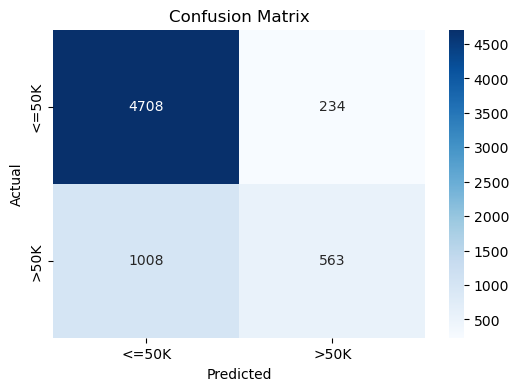

In [12]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()